### Loading important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import plotly.express as pe
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing the Bankrupt Dataset

In [2]:
bankrupt = pd.read_csv('Bankruptcy-prevention1.csv')
bankrupt

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [3]:
bankrupt.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [4]:
bankrupt.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


The data set includes the following variables: industrial_risk, 
management_risk,
financial flexibility,
credibility, 
competitiveness,operating_risk. 
with the values 0=low risk, 0.5=medium risk, 1=high risk. 
AND
class: bankruptcy, non-bankruptcy (target variable).

###### We need to have LOW(industrial risk,management risk,operating risk) and HIGH(financial flexibility,credibility,competitiveness) in order to avoid Bankruptcy

## EDA

In [5]:
bankrupt.dtypes

industrial_risk           float64
 management_risk          float64
 financial_flexibility    float64
 credibility              float64
 competitiveness          float64
 operating_risk           float64
 class                     object
dtype: object

###### Here is no need to change any datatype as all of them are of float 64

In [6]:
# Checking for missing values
bankrupt.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [7]:
# for all the columns 
bankrupt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


##### so, there are no null values 

In [8]:
bankrupt.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
bankrupt_new = bankrupt.iloc[:,:]
bankrupt_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [10]:
bankrupt_new["class_yn"] = 1
bankrupt_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,1
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,1
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,1
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


### Categorical to descrete
#### Here we are changing  the target variable to bankruptcy = 0, non-bankruptcy = 1

In [11]:
bankrupt_new.loc[bankrupt[' class'] == 'bankruptcy', 'class_yn'] = 0

In [12]:
bankrupt_new.drop(' class', inplace = True, axis =1)
bankrupt_new.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


### correlation 


In [13]:
bankrupt_new.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class_yn,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


<AxesSubplot:>

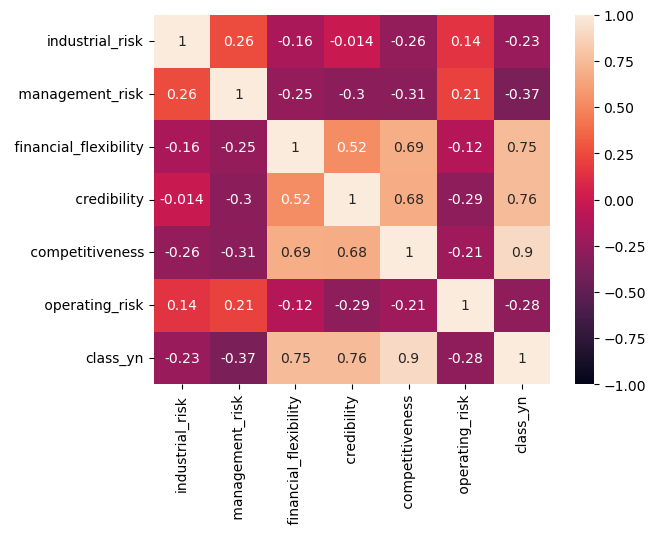

In [14]:
sns.heatmap(bankrupt_new.corr(), vmin = -1, vmax = 1, annot = True)

## Outlier detection and deletion
### Isolation Forest

In [15]:
from sklearn.ensemble import IsolationForest
# training the model
iso = IsolationForest(random_state=10,contamination=.01)
iso.fit(bankrupt_new)
outliers = iso.predict(bankrupt_new)
outliers
# outlier

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [16]:
bankrupt_new['scores']=iso.decision_function(bankrupt_new)
bankrupt_new['anomaly']=iso.predict(bankrupt_new.iloc[:,0:7])
bankrupt_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn,scores,anomaly
0,0.5,1.0,0.0,0.0,0.0,0.5,0,0.145712,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0,0.179722,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0,0.089607,1
3,0.5,0.0,0.0,0.5,0.0,1.0,0,0.067834,1
4,1.0,1.0,0.0,0.0,0.0,1.0,0,0.215060,1
...,...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1,0.104623,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1,0.091653,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1,0.088232,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1,0.068579,1


In [17]:
#print the anomaly
bankrupt_new[bankrupt_new['anomaly']==-1]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn,scores,anomaly
27,0.0,0.0,0.0,0.0,0.0,1.0,0,-0.000517,-1
72,1.0,0.5,1.0,0.5,0.0,0.0,0,-0.044748,-1
192,0.5,1.0,0.0,0.0,1.0,0.0,1,-0.002184,-1


In [18]:
# drop the anamalies and reset indices
bankrupt_new= bankrupt_new.drop(bankrupt_new.index[[27, 72, 192]], axis=0)
bankrupt_new.reset_index(drop=True,inplace = True)
bankrupt_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn,scores,anomaly
0,0.5,1.0,0.0,0.0,0.0,0.5,0,0.145712,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0,0.179722,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0,0.089607,1
3,0.5,0.0,0.0,0.5,0.0,1.0,0,0.067834,1
4,1.0,1.0,0.0,0.0,0.0,1.0,0,0.215060,1
...,...,...,...,...,...,...,...,...,...
242,0.0,1.0,1.0,1.0,1.0,1.0,1,0.104623,1
243,1.0,1.0,0.5,1.0,1.0,0.0,1,0.091653,1
244,0.0,1.0,1.0,0.5,0.5,0.0,1,0.088232,1
245,1.0,0.0,0.5,1.0,0.5,0.0,1,0.068579,1


## Feature selection 
### Chi2 test (Univariate Selection)
higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.

In [19]:
from sklearn.feature_selection import chi2

X = bankrupt_new.iloc[:,:-1]
Y = bankrupt_new['class_yn']

In [20]:
chi_scores=chi2(X,Y)

In [21]:
chi_scores

(array([  4.29192027,  10.11549296,  61.98585131,  52.47818764,
         80.43448033,   6.37538126, 105.        ,   0.42522667]),
 array([3.82938917e-02, 1.47028103e-03, 3.45933956e-15, 4.35053609e-13,
        3.00505512e-19, 1.15714180e-02, 1.22135838e-24, 5.14340494e-01]))

In [22]:
chi_scores

(array([  4.29192027,  10.11549296,  61.98585131,  52.47818764,
         80.43448033,   6.37538126, 105.        ,   0.42522667]),
 array([3.82938917e-02, 1.47028103e-03, 3.45933956e-15, 4.35053609e-13,
        3.00505512e-19, 1.15714180e-02, 1.22135838e-24, 5.14340494e-01]))

<AxesSubplot:>

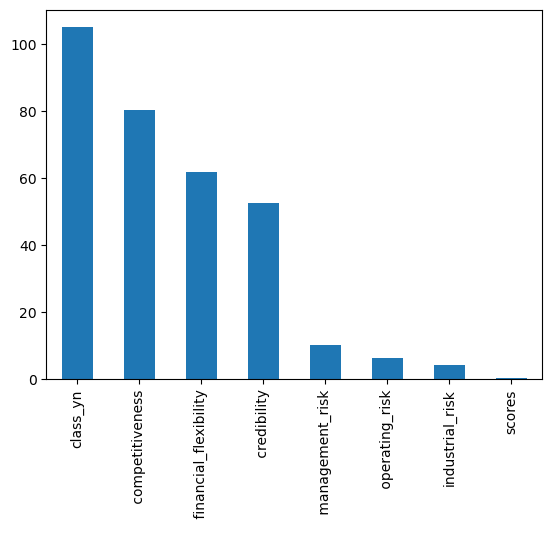

In [23]:
chi_values=pd.Series(chi_scores[0],index=X.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

#### By Looking at the chi2 test we can say that financial flexibility, credibility and competitiveness are imporatant features wrt our target variable class_yn. 

### PPS SCORE

In [24]:
# !pip install ppscore
import ppscore as ps

In [25]:
Bank2 =bankrupt_new.iloc[:,0:7]

In [26]:
#calculate the whole PPS matrix
ps.matrix(Bank2)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,industrial_risk,industrial_risk,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,industrial_risk,management_risk,0.112190,regression,True,mean absolute error,0.362348,0.321696,DecisionTreeRegressor()
2,industrial_risk,financial_flexibility,0.005409,regression,True,mean absolute error,0.350202,0.348308,DecisionTreeRegressor()
3,industrial_risk,credibility,0.000000,regression,True,mean absolute error,0.346154,0.364014,DecisionTreeRegressor()
4,industrial_risk,competitiveness,0.006119,regression,True,mean absolute error,0.386640,0.384274,DecisionTreeRegressor()
5,industrial_risk,operating_risk,0.000604,regression,True,mean absolute error,0.384615,0.384383,DecisionTreeRegressor()
6,industrial_risk,class_yn,0.000000,regression,True,mean absolute error,0.425101,0.466110,DecisionTreeRegressor()
7,management_risk,industrial_risk,0.000000,regression,True,mean absolute error,0.338057,0.347358,DecisionTreeRegressor()
8,management_risk,management_risk,1.000000,predict_itself,True,None,0.000000,1.000000,None
9,management_risk,financial_flexibility,0.040381,regression,True,mean absolute error,0.350202,0.336061,DecisionTreeRegressor()


**as we can see that competitiveness ,credibility and financial flexibility are more important with respect to our target variable i.e class_yn**


financial_flexibility with a ppscore of 0.657231.
credibility (ppscore: 0.597028) and 
competitiveness (ppscore: 0.608232)
features such as "operating_risk" and "industrial_risk" have lower ppscores.

**Let's see in bargraph**

In [27]:
data = {
    "x": ["industrial_risk", "management_risk", "financial_flexibility", "credibility", "competitiveness", "operating_risk"],
    "ppscore": [0.000000, 0.018152, 0.657231, 0.597028, 0.921872, 0.000000]
}  
df = pd.DataFrame(data)


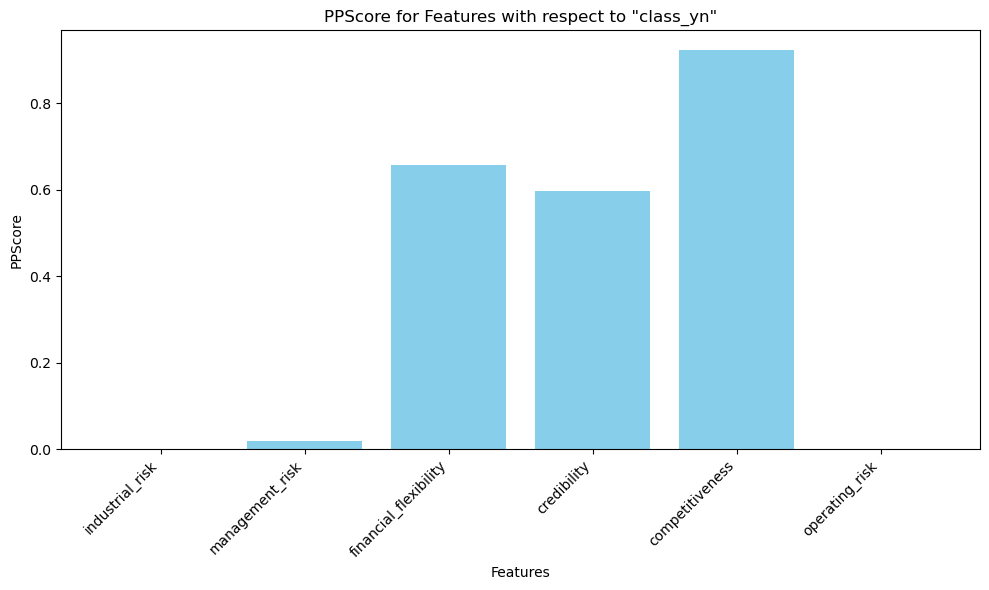

In [28]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df["x"], df["ppscore"], color='skyblue')
plt.xlabel('Features')
plt.ylabel('PPScore')
plt.title('PPScore for Features with respect to "class_yn"')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Sliptting the data into train and test
Train Test split Splitting our dataset into train and test using train_test_split(), what we are doing here is taking 80% of data to train our model, and 20% that we will hold back as a validation dataset:


In [29]:
columns_to_drop = ['industrial_risk', ' management_risk', ' operating_risk','scores','anomaly'] 
# Drop the columns
df =bankrupt_new.drop(columns=columns_to_drop)

In [30]:
from sklearn.model_selection import train_test_split # train and test
from sklearn import metrics
from sklearn import preprocessing 
from sklearn.metrics import classification_report

In [31]:
df

,financial_flexibility,credibility,competitiveness,class_yn
0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0
3,0.0,0.5,0.0,0
4,0.0,0.0,0.0,0
...,...,...,...,...
242,1.0,1.0,1.0,1
243,0.5,1.0,1.0,1
244,1.0,0.5,0.5,1
245,0.5,1.0,0.5,1


In [32]:
# Input
x = df.iloc[:,:-1]

 # Target variable

y = df.iloc[:,-1]

In [33]:
x

,financial_flexibility,credibility,competitiveness
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.5,0.0
4,0.0,0.0,0.0
...,...,...,...
242,1.0,1.0,1.0
243,0.5,1.0,1.0
244,1.0,0.5,0.5
245,0.5,1.0,0.5


In [34]:
y

0      0
1      0
2      0
3      0
4      0
      ..
242    1
243    1
244    1
245    1
246    1
Name: class_yn, Length: 247, dtype: int64

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

# Preparing models
## 1. Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

logisticlassifier = LogisticRegression() 

In [37]:
logisticlassifier.fit(x_train, y_train)

logisticlassifier.coef_   # coefficients of features


array([[2.71719737, 2.58887167, 3.61590709]])

###  After the traing the model then we prediction on test data


In [38]:
y_pred = logisticlassifier.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0], dtype=int64)

### let's test the performance of our model - confusion matrix


In [39]:
from sklearn.metrics import confusion_matrix

confusion_logist = confusion_matrix(y_test, y_pred)

confusion_logist


array([[25,  0],
       [ 0, 25]], dtype=int64)

**True Positive (TP):25 ,    True Negative (TN):25**

###  Accuracy of a Model

In [40]:
# Train Accuracy
train_acc_logist = np.mean(logisticlassifier.predict(x_train)== y_train)
train_acc_logist

1.0

In [41]:
# Test Accuracy
test_acc_logist = np.mean(logisticlassifier.predict(x_test)== y_test)
test_acc_logist

1.0

In [42]:
from sklearn.metrics import accuracy_score

logistic_acc = accuracy_score(y_test, y_pred)
logistic_acc

1.0

### Accuracy of overall model

In [43]:
logisticlassifier.fit(x, y)

logisticlassifier.coef_ # coefficients of features



array([[2.96549839, 2.5482237 , 4.01279845]])

In [44]:
y_pred = logisticlassifier.predict(x)

confusion_matrix = confusion_matrix(y, y_pred)
confusion_matrix


array([[105,   0],
       [  0, 142]], dtype=int64)

In [45]:
acc = accuracy_score(y, y_pred)
acc

1.0

In [46]:
logisticlassifier.score(x_test, y_test)

1.0

In [47]:
logisticlassifier.score(x_train, y_train)

1.0

# 2. KNN model

In [48]:
from sklearn.neighbors import KNeighborsClassifier as KNC
import warnings
warnings.filterwarnings('ignore')

### To choose k value 

In [49]:
import math
math.sqrt(len(y_test))

7.0710678118654755

Here we are choosing the k value to be  7 (choosing odd value)

Define the model KNN and fit model

In [50]:
KNN_classifier = KNC(n_neighbors =7, p = 2, metric = 'euclidean')

In [51]:
KNN_classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

#### Predict the Test set results

In [52]:
y_pred = KNN_classifier.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0], dtype=int64)

#### Evaluate model

In [53]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[25,  0],
       [ 0, 25]], dtype=int64)

In [54]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

1.0

#### Accuracy of KNN model


In [55]:
from sklearn.metrics import accuracy_score

KNN_acc = accuracy_score(y_test, y_pred)
KNN_acc

1.0

## 3.DecisionTree

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [57]:
dtc = DecisionTreeClassifier(criterion='gini')

dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)
y_pred


array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0], dtype=int64)

##### Evaluation

In [58]:

from sklearn.metrics import classification_report, confusion_matrix

In [59]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



##### Acuuracy 

In [60]:
confusion_matrix(y_test,y_pred)

array([[25,  0],
       [ 0, 25]], dtype=int64)

In [61]:
# Taining accuaracy 
dtc.score(x_train,y_train)

1.0

In [62]:
# testing accuracy
dtc.score(x_test,y_test)

1.0

# 3. Naive Bayes Classifier

In [63]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB


#### Creating GaussianNB and MultinomialNB functions


In [64]:
GNB = GaussianNB()
MNB = MultinomialNB()

#### Building the model with GaussianNB


In [65]:
Naive_GNB = GNB.fit(x_train ,y_train)

y_pred = Naive_GNB.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0], dtype=int64)

#### Evaluate Model

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[24  1]
 [ 0 25]]


#### Accuracy of GNB

In [67]:
from sklearn.metrics import accuracy_score

GNB_acc = accuracy_score(y_test , y_pred)
GNB_acc

0.98

#### Building the model with MultinomialNB


In [68]:
Naive_MNB = MNB.fit(x_train ,y_train)

y_pred = Naive_MNB.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1], dtype=int64)

#### Evaluating Model


In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 2, 23],
       [ 0, 25]], dtype=int64)

#### Accuracy of MNB

In [70]:
from sklearn.metrics import accuracy_score

MNB_acc = accuracy_score(y_test , y_pred)
MNB_acc

0.54

# 4. Support Vector Machine

In [71]:
from sklearn.svm import SVC


#### Kernel = Linear model

In [72]:
model_linear = SVC(kernel = 'linear')

model_linear.fit(x_train, y_train)

pred_test_linear = model_linear.predict(x_test)

# np.mean(pred_test_linear==y_test)


In [73]:
print(model_linear.score(x_train, y_train))


0.9949238578680203


In [74]:
print(model_linear.score(x_test, y_test))

0.96


#### Kernel = poly model

In [75]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)

# np.mean(pred_test_poly==y_test) # Accuracy

In [76]:
print(model_poly.score(x_train, y_train))

0.9949238578680203


In [77]:
print(model_poly.score(x_test, y_test))

1.0


#### Kernel = 'rbf' model --> Radial Basis Function 

In [78]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)

# np.mean(pred_test_rbf==y_test) # Accuracy

In [79]:
print(model_rbf.score(x_train, y_train))

1.0


In [80]:
print(model_rbf.score(x_test, y_test))

1.0


In [81]:
import numpy as np
import pickle
import pandas as pd
import streamlit as st
